# Tasks

You will be working with Zillow's publicly available Zillow House Value Index (ZHVI) https://www.zillow.com/research/data/

- Specifically, you will be using the Home Value data set for:
    - Data Type = "ZHVI All Homes (SFR+Condo/Coop) - Time Series - Smoothed - Seasonally Adjusted"
    - Geography = "City"
- We have already downloaded the file for you and uploaded it to Google Drive.

- Direct URL (for Pandas): https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv



## Part 1

- First, you will prepare the dataset for time series analysis:
    - Load in the Zillow Home Value Index dataframe.

- Filter the 4 largest cities into a new dataframe.
    - Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
        - Therefore the 4 largest cities would have rank values of [0,1,2,3]

- Melt the data to long-form and prepare it for time series analysis.
    - Convert the melted dates into datetime datatype.
    - Make the datetime column the index.
- Resample the dataframe as monthly frequency, grouped by City.

## Part 2

- Once you've prepared the dataframe with the time series data for the 4 largest cities:
    - Plot the home values for all 4 cities. (Hint: use unstack)
        - Make sure to add a title and axis labels.
        - Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
            - Hint: use the FuncFormatter from matplotlib.

- Answer the following 2 questions using pandas:

- 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
    - Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex. 
- 2) How much did the home values change from November 2008 to December 2008 (in dollars)?
    - Hint: you can use .diff() to calculate the change in values

# Part 1


In [134]:
# Load in the Zillow Home Value Index dataframe.
import pandas as pd 
import matplotlib.ticker as mticks
fpath=('https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv')
df= pd.read_csv(fpath)
df.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [135]:
#Filter the 4 largest cities into a new dataframe.
df2=df[df['SizeRank']<4]
df2.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [136]:
# drop all unneeded cols before the melt
df2=df2.drop(columns = ['RegionID', 'SizeRank','RegionType', 
                    'StateName', 'State', 'Metro','CountyName'])
df2

,RegionName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,New York,253690.0,255517.0,257207.0,260310.0,263204.0,266206.0,269324.0,272045.0,274610.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,Los Angeles,234181.0,234401.0,235513.0,237589.0,240113.0,242421.0,244805.0,247479.0,249984.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,Houston,109068.0,109079.0,108878.0,108881.0,108834.0,109066.0,109287.0,109631.0,110062.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,Chicago,166139.0,166536.0,167368.0,168826.0,170499.0,172008.0,173598.0,175282.0,176928.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [137]:
# Melt the data to long-form and prepare it for time series analysis
melted = pd.melt(df2,id_vars=['RegionName'],
                value_name='Price',var_name="Date" )

melted

,RegionName,Date,Price
0,New York,2000-01-31,253690.0
1,Los Angeles,2000-01-31,234181.0
2,Houston,2000-01-31,109068.0
3,Chicago,2000-01-31,166139.0
4,New York,2000-02-29,255517.0
...,...,...,...
1087,Chicago,2022-08-31,315587.0
1088,New York,2022-09-30,781622.0
1089,Los Angeles,2022-09-30,966595.0
1090,Houston,2022-09-30,272639.0


In [138]:
#Convert the melted dates into datetime datatype.
melted['Date'] = pd.to_datetime(melted['Date'])
#Make the datetime column the index.
melted = melted.set_index("Date")
melted


,RegionName,Price
Date,,
2000-01-31,New York,253690.0
2000-01-31,Los Angeles,234181.0
2000-01-31,Houston,109068.0
2000-01-31,Chicago,166139.0
2000-02-29,New York,255517.0
...,...,...
2022-08-31,Chicago,315587.0
2022-09-30,New York,781622.0
2022-09-30,Los Angeles,966595.0


In [139]:
#Resample the dataframe as monthly frequency, grouped by City.

df_ts=melted.groupby('RegionName').resample("MS").sum()
df_ts

C:\Users\clove\AppData\Local\Temp\ipykernel_35548\3812297550.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts=melted.groupby('RegionName').resample("MS").sum()


Price
RegionName Date                
Chicago    2000-01-01  166139.0
           2000-02-01  166536.0
           2000-03-01  167368.0
           2000-04-01  168826.0
           2000-05-01  170499.0
...                         ...
New York   2022-05-01  768797.0
           2022-06-01  773944.0
           2022-07-01  777692.0
           2022-08-01  779960.0
           2022-09-01  781622.0

[1092 rows x 1 columns]

# Part 2

In [140]:
# identify multiinxed to unstack
df_ts.index.get_level_values(0)

Index(['Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago',
       'Chicago', 'Chicago', 'Chicago', 'Chicago',
       ...
       'New York', 'New York', 'New York', 'New York', 'New York', 'New York',
       'New York', 'New York', 'New York', 'New York'],
      dtype='object', name='RegionName', length=1092)

In [141]:
#unstack state names values
unstacked=df_ts.unstack(level=0)
unstacked

Price                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-01  166139.0  109068.0    234181.0  253690.0
2000-02-01  166536.0  109079.0    234401.0  255517.0
2000-03-01  167368.0  108878.0    235513.0  257207.0
2000-04-01  168826.0  108881.0    237589.0  260310.0
2000-05-01  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-01  312487.0  265558.0    990391.0  768797.0
2022-06-01  314663.0  268901.0    992337.0  773944.0
2022-07-01  315910.0  271059.0    992630.0  777692.0
2022-08-01  315587.0  272400.0    978196.0  779960.0
2022-09-01  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

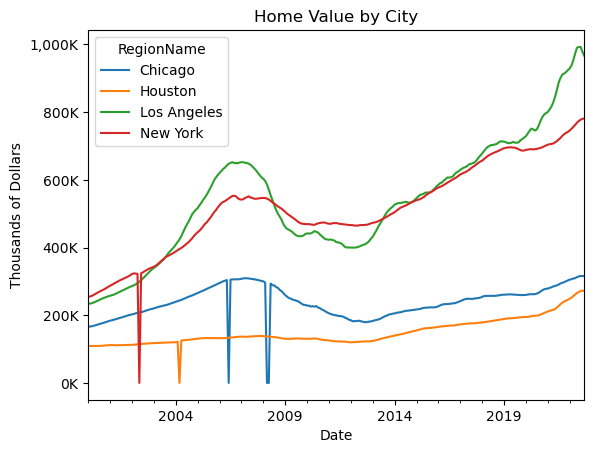

In [142]:
#Once you've prepared the dataframe with the time series data for the 4 largest cities:


#Reformat the y-axis ticks to use thousands of dollars with a "K" at the end via funcformatter
def thousands(x,pos):
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_thous = mticks.FuncFormatter(thousands)


ax=unstacked['Price'].plot()
ax.yaxis.set_major_formatter(fmt_thous)
ax.set(title='Home Value by City',ylabel='Thousands of Dollars');



## Answer the following 2 questions using pandas:
- 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
    - Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex. 



In [143]:
# Filtering by Date with a MultiIndex using pd.IndexSlice
df_ts.loc[pd.IndexSlice[:,'12-2008'],:].idxmax()

Price    (New York, 2008-12-01 00:00:00)
dtype: object

In [144]:
df_ts.loc[pd.IndexSlice[:,'12-2008'],:].max()

Price    510309.0
dtype: float64

In [145]:
df_ts.loc[pd.IndexSlice[:,'12-2008'],:].idxmin()

Price    (Houston, 2008-12-01 00:00:00)
dtype: object

In [146]:
df_ts.loc[pd.IndexSlice[:,'12-2008'],:].min()

Price    131283.0
dtype: float64

### Q1 A:
- the highest value was in new york  for $510309
- the lowest value was in houston for    $131283


## Q2
- 2) How much did the home values change from November 2008 to December 2008 (in dollars)?
    - Hint: you can use .diff() to calculate the change in values

In [147]:
diff=df_ts.diff()
diff

Price
RegionName Date              
Chicago    2000-01-01     NaN
           2000-02-01   397.0
           2000-03-01   832.0
           2000-04-01  1458.0
           2000-05-01  1673.0
...                       ...
New York   2022-05-01  6476.0
           2022-06-01  5147.0
           2022-07-01  3748.0
           2022-08-01  2268.0
           2022-09-01  1662.0

[1092 rows x 1 columns]

In [148]:
#slice the date range 
diff.loc[pd.IndexSlice[:,'11/2008':'12/2008'],:]


Price
RegionName  Date               
Chicago     2008-11-01  -3790.0
            2008-12-01  -5753.0
Houston     2008-11-01   -942.0
            2008-12-01   -964.0
Los Angeles 2008-11-01  -9074.0
            2008-12-01 -12611.0
New York    2008-11-01  -3281.0
            2008-12-01  -4458.0

In [149]:
# further slice just to see what not specifying a range, and rather specifying our target would output.
diff.loc[pd.IndexSlice[:,'12/2008'],:]

,,Price
RegionName,Date,
Chicago,2008-12-01,-5753.0
Houston,2008-12-01,-964.0
Los Angeles,2008-12-01,-12611.0
New York,2008-12-01,-4458.0


## Q2 A:
the home values dropped in the following cities as follows

![Alt text](image.png)